In [7]:
# Installer les bibliothèques (si ce n'est pas déjà fait)
!pip install pandas numpy

# Importer les bibliothèques
import pandas as pd
import numpy as np

# Charger le dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")

# Afficher les 10 premières lignes
print(df.head(10))

# Identifier et calculer le pourcentage des valeurs manquantes
missing_percentage = df.isnull().sum() / len(df) * 100
print("Pourcentage de valeurs manquantes par colonne:\n", missing_percentage)

# Identifier les colonnes numériques et catégorielles
print("\nTypes de données des colonnes:\n", df.dtypes)

# TASK 1: Nombre de lancements par site
launch_counts = df['LaunchSite'].value_counts()
print("\nNombre de lancements par site:\n", launch_counts)

# TASK 2: Nombre et occurrence de chaque orbite (sans compter GTO)
orbit_counts = df['Orbit'].value_counts()
orbit_counts = orbit_counts.drop('GTO', errors='ignore')
print("\nNombre et occurrence de chaque orbite:\n", orbit_counts)

# TASK 3: Nombre et occurrence des résultats de mission
landing_outcomes = df['Outcome'].value_counts()
print("\nOccurrences des résultats de mission:\n", landing_outcomes)

# Identifier les "bad outcomes" (échecs)
# On choisit les indices correspondant aux échecs dans landing_outcomes
# Ajuster selon l'ordre réel des outcomes dans landing_outcomes
bad_outcomes = set(landing_outcomes.keys()[[1,3,5,6,7]])
print("\nBad outcomes:", bad_outcomes)

# TASK 4: Créer une colonne de classification (1 = succès, 0 = échec)
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in df['Outcome']]
df['Class'] = landing_class

# Afficher les 8 premières lignes de la colonne Class
print("\nColonne Class:\n", df[['Class']].head(8))

# Vérifier le taux de succès
success_rate = df["Class"].mean()
print("\nTaux de succès des lancements:", success_rate)

# Exporter le dataset pour la suite
df.to_csv("dataset_part_2.csv", index=False)


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   
5             6  2014-01-06       Falcon 9  3325.000000   GTO  CCAFS SLC 40   
6             7  2014-04-18       Falcon 9  2296.000000   ISS  CCAFS SLC 40   
7             8  2014-07-14       Falcon 9  1316.000000   LEO  CCAFS SLC 40   
8             9  2014-08-05       Falcon 9  4535.000000   GTO  CCAFS SLC 40   
9            10  2014-09-07       Falcon 9  4428.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN 

In [3]:
# -----------------------------------------------
# EXO 3 – EDA et Préparation pour Analyse Prédictive
# -----------------------------------------------

# Installer pandas et numpy dans Jupyter
!pip install pandas numpy --quiet

# Importer les bibliothèques (pas besoin d'installer sqlite3)
import pandas as pd
import numpy as np
import sqlite3

# Charger le dataset
df = pd.read_csv(
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv"
)

# Aperçu des 10 premières lignes
print("First 10 rows of the dataset:")
print(df.head(10))

# Vérifier les valeurs manquantes
missing_percentage = df.isnull().sum() / len(df) * 100
print("\nPercentage of missing values per column:\n", missing_percentage)

# Identifier les colonnes numériques et catégorielles
print("\nColumn data types:\n", df.dtypes)

# Nombre de lancements par site
launch_counts = df['LaunchSite'].value_counts()
print("\nNumber of launches per site:\n", launch_counts)

# Nombre et occurrence de chaque orbite (sans GTO)
orbit_counts = df['Orbit'].value_counts().drop('GTO', errors='ignore')
print("\nNumber and occurrence of each orbit:\n", orbit_counts)

# Nombre et occurrence des résultats de mission
landing_outcomes = df['Outcome'].value_counts()
print("\nOccurrences of mission outcomes:\n", landing_outcomes)

# Identifier les "bad outcomes"
bad_outcomes = set(landing_outcomes.keys()[[1,3,5,6,7]])
print("\nBad outcomes:", bad_outcomes)

# Créer colonne Class
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in df['Outcome']]
df['Class'] = landing_class
print("\nClass column preview:")
print(df[['Class']].head(8))

# Taux de succès
success_rate = df["Class"].mean()
print("\nLaunch success rate:", success_rate)

# Exporter pour la suite
df.to_csv("dataset_part_2.csv", index=False)

# EDA avec SQL (SQLite)
conn = sqlite3.connect(":memory:")
df.to_sql("spacex_launches", conn, index=False, if_exists='replace')

# Exemple de requêtes SQL
launch_site_sql = pd.read_sql("SELECT LaunchSite, COUNT(*) AS LaunchCount FROM spacex_launches GROUP BY LaunchSite ORDER BY LaunchCount DESC;", conn)
print("\nSQL - Number of launches per site:")
print(launch_site_sql)

orbit_sql = pd.read_sql("SELECT Orbit, COUNT(*) AS Count FROM spacex_launches WHERE Orbit != 'GTO' GROUP BY Orbit ORDER BY Count DESC;", conn)
print("\nSQL - Number and occurrence of each orbit:")
print(orbit_sql)

outcome_sql = pd.read_sql("SELECT Outcome, COUNT(*) AS Count FROM spacex_launches GROUP BY Outcome ORDER BY Count DESC;", conn)
print("\nSQL - Occurrences of mission outcomes:")
print(outcome_sql)

success_rate_sql = pd.read_sql("SELECT AVG(Class) AS SuccessRate FROM spacex_launches;", conn)
print("\nSQL - Launch success rate:")
print(success_rate_sql)


First 10 rows of the dataset:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   
5             6  2014-01-06       Falcon 9  3325.000000   GTO  CCAFS SLC 40   
6             7  2014-04-18       Falcon 9  2296.000000   ISS  CCAFS SLC 40   
7             8  2014-07-14       Falcon 9  1316.000000   LEO  CCAFS SLC 40   
8             9  2014-08-05       Falcon 9  4535.000000   GTO  CCAFS SLC 40   
9            10  2014-09-07       Falcon 9  4428.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     Fa

In [5]:
# -----------------------------------------------
# Interactive Map with Folium – Falcon 9 Launch Sites
# -----------------------------------------------

# Installer Folium (une seule fois)
!pip install folium --quiet

import pandas as pd
import folium

# Charger le dataset de l'exo 3
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")

# Filtrer Falcon 9 uniquement (si pas déjà filtré)
df = df[df['BoosterVersion'] != 'Falcon 1'].copy()

# Créer une carte centrée sur la Floride (zone de lancement principale)
spacex_map = folium.Map(location=[28.5623, -80.5774], zoom_start=5)

# Ajouter des markers pour chaque lancement
for i, row in df.iterrows():
    # Couleur du marker selon réussite de l'atterrissage
    color = 'green' if row['Outcome'] in ['True ASDS', 'True RTLS', 'True Ocean'] else 'red'
    
    # Ajouter le marker
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=(f"Flight: {row['FlightNumber']}<br>"
               f"Launch Site: {row['LaunchSite']}<br>"
               f"Orbit: {row['Orbit']}<br>"
               f"Outcome: {row['Outcome']}"),
        icon=folium.Icon(color=color)
    ).add_to(spacex_map)

# Afficher la carte
spacex_map.save("spacex_falcon9_map.html")  # Permet de sauvegarder la carte pour visualiser dans un navigateur
spacex_map  # Affiche la carte directement dans Jupyter


In [6]:
# -----------------------------------------------
# EXO 4 – EDA avec SQL
# -----------------------------------------------

import pandas as pd
import sqlite3

# Charger le dataset nettoyé de l'Exo 3
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# Créer une base SQLite en mémoire
conn = sqlite3.connect(':memory:')

# Charger le DataFrame dans SQLite
df.to_sql('spacex', conn, index=False, if_exists='replace')

# Créer un curseur pour exécuter les requêtes
cur = conn.cursor()

# ----------------------------
# Task 6: Boosters with success on drone ship and payload mass between 4000 and 6000
# ----------------------------
print("Task 6:")
query6 = """
SELECT BoosterVersion, PayloadMass, Outcome
FROM spacex
WHERE Outcome LIKE 'True ASDS'
  AND PayloadMass > 4000 AND PayloadMass < 6000;
"""
df_task6 = pd.read_sql_query(query6, conn)
print(df_task6)

# ----------------------------
# Task 7: Total number of successful and failure mission outcomes
# ----------------------------
print("\nTask 7:")
query7 = """
SELECT Outcome, COUNT(*) as Total
FROM spacex
GROUP BY Outcome;
"""
df_task7 = pd.read_sql_query(query7, conn)
print(df_task7)

# ----------------------------
# Task 8: Booster_versions that carried the maximum payload mass
# ----------------------------
print("\nTask 8:")
query8 = """
SELECT BoosterVersion, PayloadMass
FROM spacex
WHERE PayloadMass = (SELECT MAX(PayloadMass) FROM spacex);
"""
df_task8 = pd.read_sql_query(query8, conn)
print(df_task8)

# ----------------------------
# Task 9: Records with month, failure landing_outcomes in drone ship, booster versions, launch_site for 2015
# ----------------------------
print("\nTask 9:")
query9 = """
SELECT 
    substr(Date, 6, 2) AS Month,
    Outcome,
    BoosterVersion,
    LaunchSite
FROM spacex
WHERE substr(Date, 1, 4) = '2015'
  AND Outcome LIKE 'False ASDS';
"""
df_task9 = pd.read_sql_query(query9, conn)
print(df_task9)

# ----------------------------
# Task 10: Rank count of landing outcomes between 2010-06-04 and 2017-03-20
# ----------------------------
print("\nTask 10:")
query10 = """
SELECT Outcome, COUNT(*) AS Count
FROM spacex
WHERE Date >= '2010-06-04' AND Date <= '2017-03-20'
GROUP BY Outcome
ORDER BY Count DESC;
"""
df_task10 = pd.read_sql_query(query10, conn)
print(df_task10)

# Fermer la connexion
conn.close()


Task 6:
  BoosterVersion  PayloadMass    Outcome
0       Falcon 9       4696.0  True ASDS
1       Falcon 9       4600.0  True ASDS
2       Falcon 9       5300.0  True ASDS
3       Falcon 9       5200.0  True ASDS
4       Falcon 9       5800.0  True ASDS
5       Falcon 9       5000.0  True ASDS

Task 7:
       Outcome  Total
0   False ASDS      6
1  False Ocean      2
2   False RTLS      1
3    None ASDS      2
4    None None     19
5    True ASDS     41
6   True Ocean      5
7    True RTLS     14

Task 8:
  BoosterVersion  PayloadMass
0       Falcon 9      15600.0
1       Falcon 9      15600.0
2       Falcon 9      15600.0

Task 9:
  Month     Outcome BoosterVersion    LaunchSite
0    01  False ASDS       Falcon 9  CCAFS SLC 40
1    04  False ASDS       Falcon 9  CCAFS SLC 40

Task 10:
       Outcome  Count
0    None None      9
1    True ASDS      5
2   False ASDS      4
3    True RTLS      3
4   True Ocean      3
5    None ASDS      2
6  False Ocean      2


Preview of dataset_part_2.csv:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B00

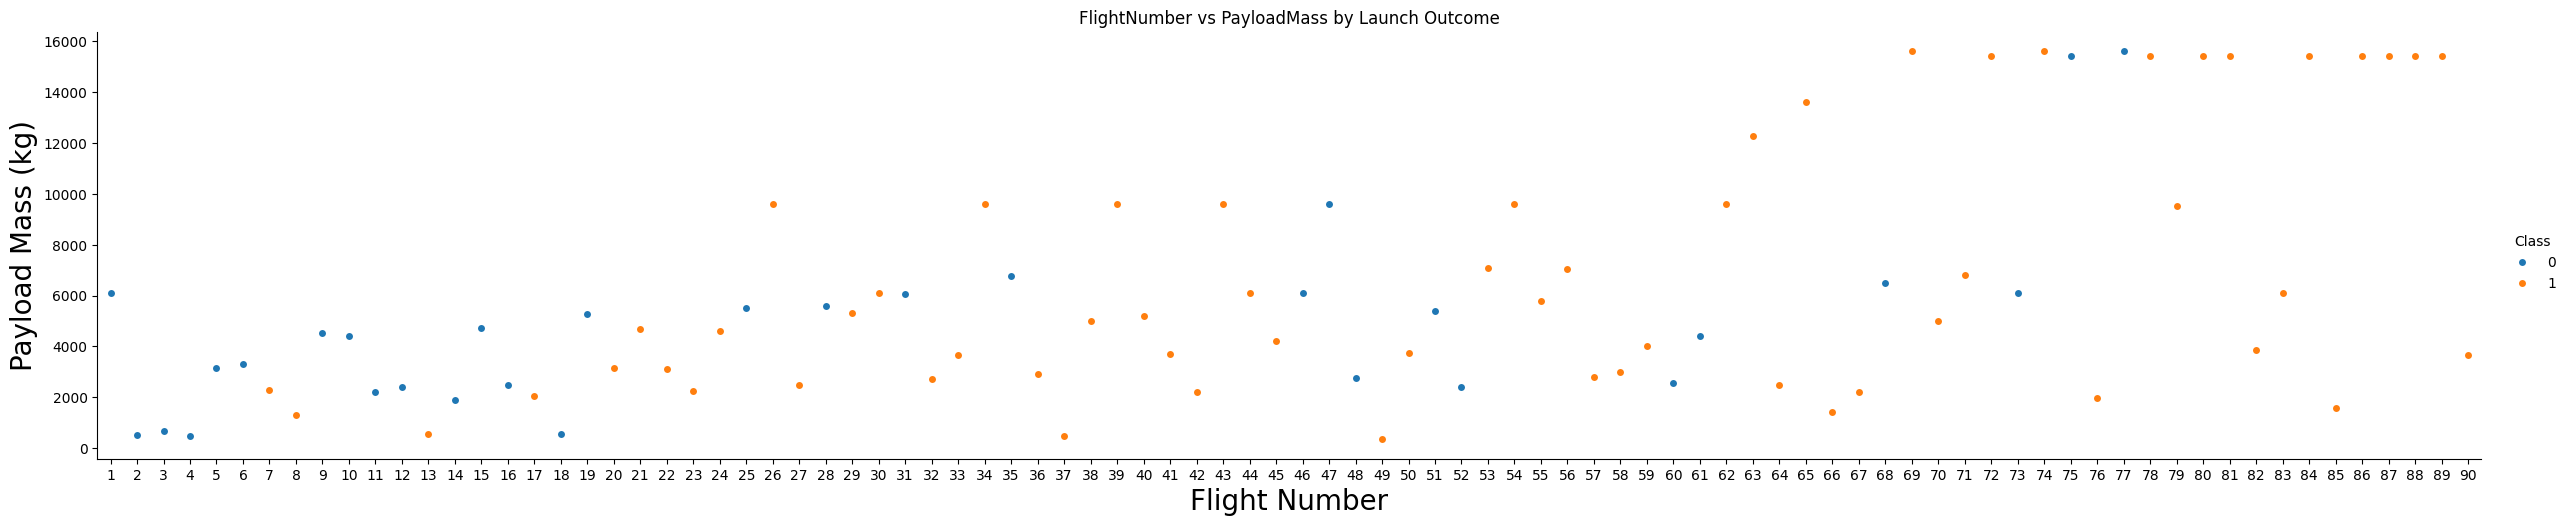


Preview of Year column added:
         Date  Year
0  2010-06-04  2010
1  2012-05-22  2012
2  2013-03-01  2013
3  2013-09-29  2013
4  2013-12-03  2013

Selected features:
   FlightNumber  PayloadMass Orbit    LaunchSite  Flights  GridFins  Reused  \
0             1  6104.959412   LEO  CCAFS SLC 40        1     False   False   
1             2   525.000000   LEO  CCAFS SLC 40        1     False   False   
2             3   677.000000   ISS  CCAFS SLC 40        1     False   False   
3             4   500.000000    PO   VAFB SLC 4E        1     False   False   
4             5  3170.000000   GTO  CCAFS SLC 40        1     False   False   

    Legs LandingPad  Block  ReusedCount Serial  
0  False        NaN    1.0            0  B0003  
1  False        NaN    1.0            0  B0005  
2  False        NaN    1.0            0  B0007  
3  False        NaN    1.0            0  B1003  
4  False        NaN    1.0            0  B1004  

Preview of features after One-Hot Encoding:
   FlightNumber

In [9]:
# -----------------------------------------------
# EXO 5 – EDA & Feature Engineering
# -----------------------------------------------

# Installer les bibliothèques nécessaires
!pip install --quiet numpy pandas matplotlib seaborn

# Importer les bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset (dataset_part_2.csv depuis Exo 3)
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)

# Afficher les 5 premières lignes
print("Preview of dataset_part_2.csv:")
print(df.head())

# --------------------------------------------------
# EDA: FlightNumber vs PayloadMass by Class
# --------------------------------------------------
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.title("FlightNumber vs PayloadMass by Launch Outcome")
plt.show()

# --------------------------------------------------
# Extract Year from Date
# --------------------------------------------------
df['Year'] = df['Date'].str.split('-').str[0]
print("\nPreview of Year column added:")
print(df[['Date', 'Year']].head())

# --------------------------------------------------
# Feature Selection
# --------------------------------------------------
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 
               'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
print("\nSelected features:")
print(features.head())

# --------------------------------------------------
# One-Hot Encoding for Categorical Features
# --------------------------------------------------
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
features_one_hot = pd.get_dummies(features, columns=categorical_columns)
print("\nPreview of features after One-Hot Encoding:")
print(features_one_hot.head())

# --------------------------------------------------
# Cast all numeric columns to float64
# --------------------------------------------------
features_one_hot = features_one_hot.astype(float)
print("\nData types after casting:")
print(features_one_hot.dtypes)

# --------------------------------------------------
# Export the engineered dataset
# --------------------------------------------------
features_one_hot.to_csv('dataset_part_3.csv', index=False)
print("\nDataset exported to 'dataset_part_3.csv'")
